In [ ]:
!pip install statsmodels

import numpy as np
import matplotlib.pyplot as plt
import constants as cs
import seaborn as sns
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import truncnorm

     |████████████████████████████████| 9.8 MB 30.3 MB/s 
     |████████████████████████████████| 233 kB 54.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


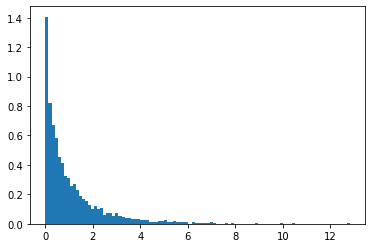

In [ ]:
# import numpy
import numpy as np
import matplotlib.pyplot as plt
  
# Using weibull() method
gfg = np.random.weibull(0.8, 5000)
# gfg = np.random.exponential(0.8, 5000) + np.random.normal(0, 0.02)

plt.hist(gfg, bins = 100, density = True)
plt.show()

In [ ]:
np.random.exponential(0.8) + np.random.normal(0, 0.01)

0.6727329914855188

In [ ]:
def generateOrderTime(day, shift):
    # weibull (lambda k)
    lambda_value = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['order_lambda'] #SUN_1
    k_value = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['order_k']

    order_time = np.random.weibull(k_value)# * lambda_value
    return(order_time)

def generateProductQuant(day, shift, product, mean, std):
    mean_val = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['{}_mean'.format(product)] #SUN_1 / P1_mean
    std_val = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['{}_std'.format(product)]

    p_min = 0
    p_max = cs.P_UPPER_LIM[product]
    
    prod_quant = get_truncated_normal(mean_val, std_val, p_min, p_max)

    return (int(prod_quant))
    
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [ ]:
x=__get_truncated_normal__(2,1,0,10)
round(x.rvs())

In [ ]:
round(x.rvs(5))

TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
round(h)

2

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

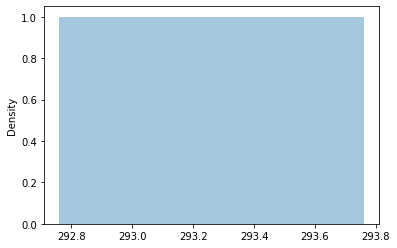

In [ ]:
from scipy.stats import weibull_min
n = 1     # number of samples
k = 0.806597743     # shape
lam = 1/0.007676763   # scale

x = weibull_min.rvs(k, loc=0, scale=lam, size=n)
sns.distplot(x)

In [ ]:
x[0]

293.26024679899285

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

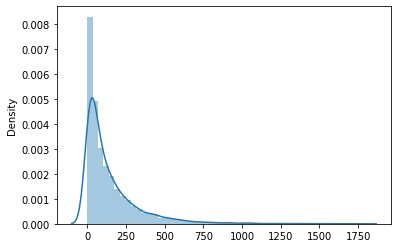

In [ ]:
order_time = np.random.weibull(k, 5000) * lam
sns.distplot(order_time)

In [ ]:
day = 'MON'
shift = 0
# weibull (lambda k)
lambda_value = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['order_lambda'] #SUN_1
k_value = cs.DISTRIBUTION['{}_{}'.format(day, shift)]['order_k']

order_time = np.random.weibull(k_value) * lambda_value
order_time


0.006226063100605689

In [ ]:
ts = pd.read_csv('strategies/order_sample.csv')

In [ ]:
ts

,Unnamed: 0,OrderTimeInSec,QtyShirt,QtyHoodie,QtySweatpants,QtySneakers
0,0,36,2,1,1,0
1,1,175,1,1,1,0
2,2,179,2,1,0,0
3,3,213,1,0,0,1
4,4,271,0,0,1,0
...,...,...,...,...,...,...
95,95,14583,1,0,1,1
96,96,14677,1,0,2,0
97,97,16246,2,1,1,0
98,98,16833,1,0,1,0


c for shirt orders: 0.689
Scale for shirt orders: 1.741


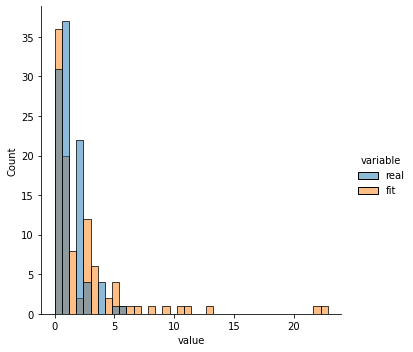

In [ ]:
c,loc,scale = st.weibull_min.fit(ts.QtyShirt.to_list())
print("c for shirt orders: {:2.3f}".format(c))
print("Scale for shirt orders: {:2.3f}".format(scale))

test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.weibull_min.rvs(c, size=ts.QtyShirt.shape)*scale
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

c for shirt orders: 0.343
Scale for shirt orders: 1.072


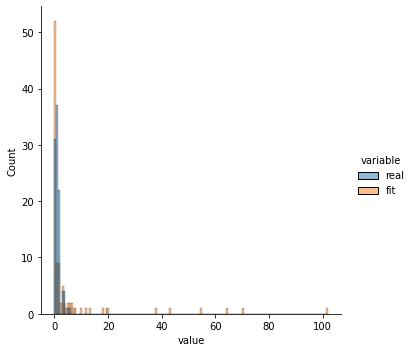

In [ ]:
c,loc,scale = st.weibull_min.fit(ts.QtyHoodie.to_list())
print("c for shirt orders: {:2.3f}".format(c))
print("Scale for shirt orders: {:2.3f}".format(scale))

test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.weibull_min.rvs(c, size=ts.QtyHoodie.shape)*scale
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

a for shirt orders: 0.730
Scale for shirt orders: 1.166


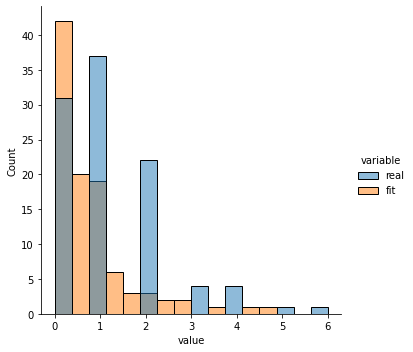

In [ ]:
a,loc,scale = st.gamma.fit(ts.QtyShirt.to_list())
print("a for shirt orders: {:2.3f}".format(a))
print("Scale for shirt orders: {:2.3f}".format(scale))

test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.gamma.rvs(a, size=ts.QtyShirt.shape)*scale
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

In [ ]:
loc,scale = st.poisson.fit(ts.QtyShirt.to_list())
print("c for shirt orders: {:2.3f}".format(c))
print("Scale for shirt orders: {:2.3f}".format(scale))

test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.poisson.rvs(loc,scale,size=ts.QtyShirt.shape)
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

AttributeError: 'poisson_gen' object has no attribute 'fit'

c for shirt orders: 0.689
Scale for shirt orders: 1.200


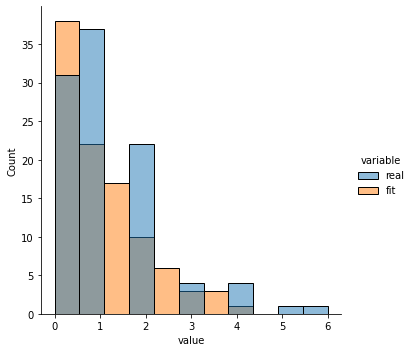

In [ ]:
loc,scale = st.expon.fit(ts.QtyShirt.to_list())
print("c for shirt orders: {:2.3f}".format(c))
print("Scale for shirt orders: {:2.3f}".format(scale))

test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.expon.rvs(loc,scale,size=ts.QtyShirt.shape)
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

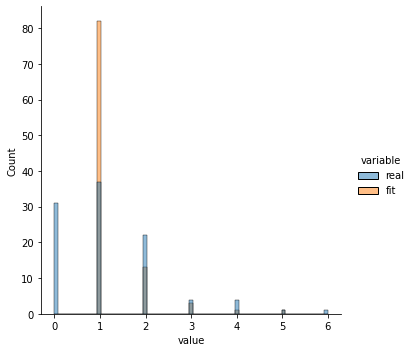

In [ ]:
test = pd.DataFrame(data={
    'real':ts.QtyShirt.to_numpy(),
    'fit':st.geom.rvs(1/st.tmean(ts.QtyShirt.to_list()), size=ts.QtyShirt.shape)
})

sns.displot(test.melt(),x='value',hue='variable',kind='hist')

In [ ]:
st.geom.rvs(1/2)

1

## Gamma Dist

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

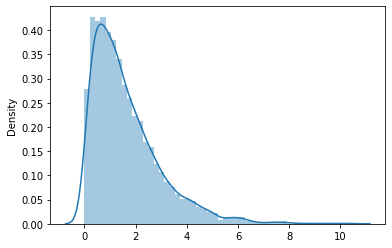

In [ ]:
G1 = np.random.gamma(1.5, scale=1.1, size=5000)
sns.distplot(G1)

In [ ]:
np.random.gamma(1.5, scale=1.1, size=1)[0]

0.38590617378101366

In [ ]:
round(np.random.gamma(1.5, scale=1.1, size=1)[0])

1

In [ ]:
# Negative Binomial 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

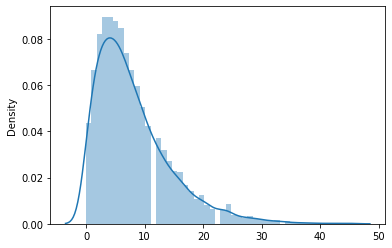

In [ ]:
B2 = np.random.negative_binomial(2, 0.2, size=5000)
sns.distplot(B2)

# Poissssssoooooon

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

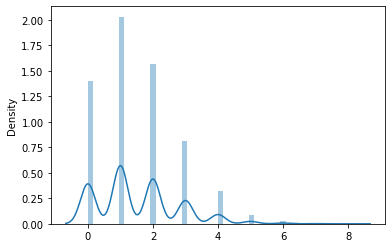

In [ ]:
p3 = np.random.poisson(1.5, size=5000)
sns.distplot(p3)

<AxesSubplot:ylabel='Count'>

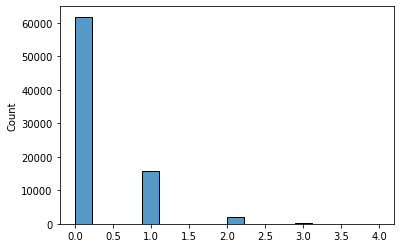

In [ ]:
nb=np.random.negative_binomial(25,0.99,79800)
sns.histplot(nb)


In [ ]:
(unique, counts) = np.unique(nb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 61940]
 [    1 15626]
 [    2  2012]
 [    3   206]
 [    4    16]]


In [ ]:
#Actual example
#0       59960
#1       17419
#2        2230
#3         184
#4          10
#5           0
#6           0
#7           0
#8           0


In [ ]:
nb=np.random.negative_binomial(50,0.99,79800)
#sns.histplot(nb)
(unique, counts) = np.unique(nb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 48076]
 [    1 24265]
 [    2  6220]
 [    3  1075]
 [    4   142]
 [    5    19]
 [    6     3]]


In [ ]:
nb=np.random.negative_binomial(22,0.95,79800)
#sns.histplot(nb)
(unique, counts) = np.unique(nb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 25884]
 [    1 28552]
 [    2 16184]
 [    3  6441]
 [    4  2055]
 [    5   552]
 [    6   106]
 [    7    24]
 [    8     1]
 [   11     1]]


In [ ]:
x=__get_truncated_normal__(.6,.99,0,8)
nb=np.around(x.rvs(79800),0)

In [ ]:
(unique, counts) = np.unique(nb, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0. 20683.]
 [    1. 39148.]
 [    2. 16964.]
 [    3.  2818.]
 [    4.   182.]
 [    5.     5.]]


In [ ]:
np.set_printoptions(suppress=True)

# Random Discrete

In [ ]:
import math
import numpy as np

values = range(1, 209)
probs = [1.0 / 208] * 208

for idx, prob in enumerate(probs):
    if idx > 3 and idx < 20:
        probs[idx] = probs[idx] * (1 + math.log(idx + 1))
    if idx > 20 and idx < 40:
        probs[idx] = probs[idx] * (1 + math.log((40 - idx) + 1))

probs = [p / sum(probs) for p in probs]
sample =  np.random.choice(values, 1000, p=probs)

In [ ]:
sample

array([ 29, 101, 158, 148,  10, 133,  89,  25, 117, 142,  88, 185, 126,
        28, 160, 133, 175, 130, 156, 163,  97, 158, 113, 174, 147,  43,
        39,  24,  33, 130,  86,  78, 199,  38,  50,  24,  43, 157,  97,
         5, 165, 111, 153,  13,  52,  29, 199, 105,  23,   7,  86, 152,
       133, 160, 173,  20,  16,   7, 109,  27, 182,  40,  73,  17,  64,
        23, 174,  40, 120, 172,  17,  32, 110,  14,  78, 158,  23, 145,
       166,  44,  83,  16, 159,  20,  17,  90,   5,   2,  68,  99,  73,
        24,  13,  18,  23,  24,  31, 204, 201,  37,   8, 107, 204,  33,
        59, 131,  34,  70,  99,  44,  86,  25,  27,  14,  14,  23,  45,
        37,  86, 193,  37,  19,  87,  28, 194,   2,  36, 183,  32,  95,
       179, 175,  11,   4, 154,  36, 110, 177, 129,  38,  99, 176, 101,
        24,  10,  93,  18, 203,  32,  41,  15, 147,  25,  78,  30, 126,
         8,  88, 123,   5,  22, 178, 124, 104,  67,  10,  29,  24,  25,
        37, 146,  34,   9,  52, 128,  12,  19,  49, 199,  19, 14

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49b2f27e-3adc-4149-b31f-ff16a80fd77c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>